# Import the necessary libraries

Pandas: To mainpulate and load dataset

Train_test_split: To split the dataset into training and testing data

TfidfVectorizer: Convert the string into numerical Vectors

RandomForestClassifier: Machine Learning approach(workframe) to classify the items. 

MultinomialNB: Naive baye approach to classify

Metrics: To calculate the accuracy and classification report that includes Presicion, Recall and F-1 Score

Nltk: Library to perform the NLP techniques.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk


# Load the dataset

In [3]:
df = pd.read_csv('E:/Harshit Raheja/Definition Health/Dataset/combined_data.csv',low_memory=False)

In [4]:
df['product_category'] = df['product_category'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else str(x))
df['product_category'].fillna('', inplace=True) #handle NULL values

In [5]:
#categorize the product based on the list of three different things
def categorize_product(category_list):
    if 'Men' in category_list:
        return 'Male'
    elif 'Women' in category_list:
        return 'Female'
    else:
        return 'Unisex'

# target value

In [7]:
df['target_category'] = df['product_category'].apply(categorize_product)

# Preprocessping text using NLP

In [8]:
 def clean_text(text):
    if pd.isna(text):
        return ''
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove special characters and digits
    
    
    words = text.lower().split() #Convert text into lowercase and split the words
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] ## Remove stopwords and lemmatize
    
    return ' '.join(words)

# cleaning text of relevant columns
text_columns = ['product_title', 'meta_data_1', 'meta_data_2', 'meta_data_3', 'spider_name']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Feature extraction

In [9]:
X = df[['product_title', 'meta_data_1', 'meta_data_2', 'meta_data_3', 'spider_name']].astype(str).agg(' '.join, axis=1)
y = df['target_category']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing TF-IDF vectorization

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# First ML Model

In [11]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# predictions on the test set
predictions = classifier.predict(X_test_tfidf)


# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.8521592437842108
Classification Report:
               precision    recall  f1-score   support

      Female       0.78      0.89      0.83     41499
        Male       0.71      0.65      0.68     21611
      Unisex       0.94      0.89      0.91     77379

    accuracy                           0.85    140489
   macro avg       0.81      0.81      0.81    140489
weighted avg       0.86      0.85      0.85    140489



# Second ML Model 

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=2)
clf.fit(X_train_tfidf, y_train)

pred = clf.predict(X_test_tfidf)

# Calculating Accuracy 

In [13]:
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6235150082924642
Classification Report:
               precision    recall  f1-score   support

      Female       0.46      0.85      0.60     41499
        Male       0.89      0.25      0.39     21611
      Unisex       0.82      0.61      0.70     77379

    accuracy                           0.62    140489
   macro avg       0.72      0.57      0.56    140489
weighted avg       0.72      0.62      0.62    140489



# Ploting Confusion Matrix of first one 

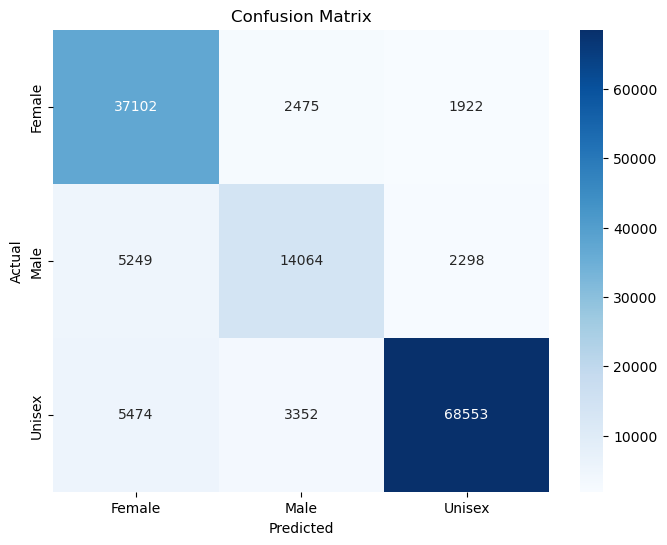

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# taking user input

In [15]:
user_input = input("Enter product details: ")
cleaned_input = clean_text(user_input)
user_input_tfidf = tfidf_vectorizer.transform([cleaned_input])
predicted_category = classifier.predict(user_input_tfidf)[0]
print(f'Predicted Gender Category: {predicted_category}')

Enter product details: Lenovo Legion 5 series
Predicted Gender Category: Unisex
